In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 7)
import numpy as np

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
folder = 'C:/Users/Lorenzo/Desktop/MyStuff/Master/Paris/Bloom/data/'

count_ig_csv = folder + 'emerging_risks_doc_count_instagram.csv'
count_tw_csv = folder + 'emerging_risks_doc_count_twitter.csv'
engagement_fb_csv = folder + 'emerging_risks_local_engagement_facebook.csv'
engagement_ig_csv = folder + 'emerging_risks_local_engagement_instagram.csv'
engagement_tw_csv = folder + 'emerging_risks_local_engagement_twitter.csv'
files = [count_ig_csv, count_tw_csv, engagement_fb_csv, engagement_ig_csv, engagement_tw_csv]

In [3]:
# %%
df = pd.read_csv(files[1])

try:
    df.drop([381, 382, 383], inplace=True) # drop rows 381, 382, 383 as they are 0 values
    df.index = pd.to_datetime(df.date)    # set date as index
except KeyError:                          # pass if rows 381, 382, 383 have already been dropped
    pass


weekly = df.Pesticides.rolling(7).mean()[7:]
smoothed = df.Pesticides.rolling(9).mean()[9:]
topic = df.Pesticides

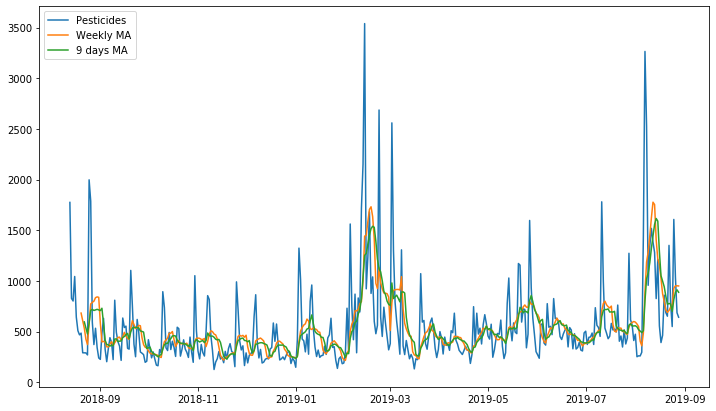

In [4]:
plt.plot(topic)
plt.plot(weekly)
plt.plot(smoothed)

plt.legend(["Pesticides", "Weekly MA", "9 days MA"])

In [5]:
automatic_arima = auto_arima(smoothed, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=3915.882, BIC=3935.299, Time=1.594 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=4219.053, BIC=4226.820, Time=0.047 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=4018.298, BIC=4033.831, Time=1.094 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=3923.556, BIC=3939.089, Time=1.109 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=4217.109, BIC=4220.993, Time=0.016 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=4123.635, BIC=4139.168, Time=0.531 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=3917.240, BIC=3940.540, Time=2.656 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse r

In [6]:
print("AIC:", automatic_arima.aic())
fitted_auto = automatic_arima.fit(smoothed)
future_forecast = automatic_arima.predict(n_periods=28)

AIC: 3907.0494163164108


In [7]:
print(automatic_arima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  372
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1947.525
Date:                              Sun, 03 May 2020   AIC                           3907.049
Time:                                      22:51:22   BIC                           3930.349
Sample:                                           0   HQIC                          3916.315
                                              - 372                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4155      0.837      0.496      0.620      -1.226       2.057
ar.L1         -0.90

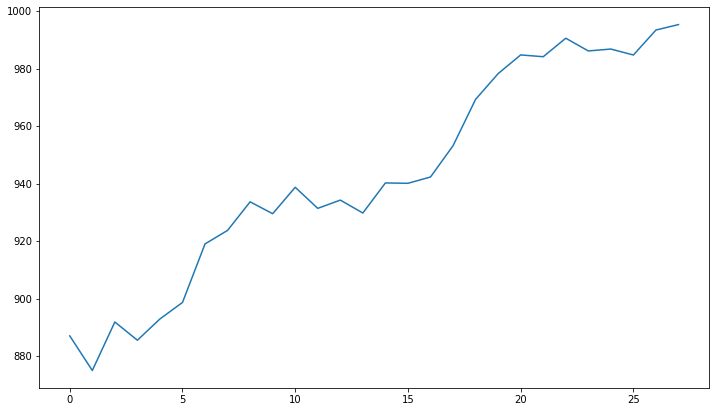

In [8]:
plt.plot(future_forecast)

In [9]:
automatic_arima.__dict__

{'order': (1, 1, 2),
 'seasonal_order': (0, 1, 1, 12),
 'start_params': None,
 'method': 'lbfgs',
 'maxiter': 50,
 'suppress_warnings': True,
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'trend': None,
 'with_intercept': True,
 'sarimax_kwargs': {'information_criterion': 'aic'},
 'arima_res_': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x26e2f4c0508>,
 'fit_with_exog_': False,
 'nobs_': 372,
 'pkg_version_': '1.5.3',
 'oob_': nan,
 'oob_preds_': None}

In [15]:
# Calculate again arima with param of auto_arima
auto_arima_bh = SARIMAX(smoothed, order=(1, 1, 2), seasonal_order=(0, 1, 1, 12)).fit()

C:\Users\Lorenzo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Lorenzo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [10]:
sec_arima = SARIMAX(smoothed, order=(4,0,9)).fit()

C:\Users\Lorenzo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Lorenzo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Lorenzo\miniconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
sec_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Pesticides   No. Observations:                  372
Model:               SARIMAX(4, 0, 9)   Log Likelihood               -1916.330
Date:                Sun, 03 May 2020   AIC                           3860.660
Time:                        22:53:39   BIC                           3915.524
Sample:                    08-22-2018   HQIC                          3882.448
                         - 08-28-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4875      0.061     24.556      0.000       1.369       1.606
ar.L2         -0.5830      0.114     -5.111      0.000      -0.807      -0.359
ar.L3          0.1759      0.118      1.491      0.136      -0.055       0.407
ar.L4         -0.0812      0.077     -1.052      0.293      -0.233       0.070
ma.L1          0.0094      0.048      0.195      0.845      -0.085       0.103
ma.L2          0.0686      0.072      0.947      0.344      -0.073       0.211
ma.L3          0.0790      0.069      1.142      0.253      -0.057       0.215
ma.L4         -0.0341      0.066     -0.521      0.602      -0.163       0.094
ma.L5          0.0318      0.050      0.637      0.524      -0.066       0.129
ma.L6          0.0665      0.047      1.428      0.153      -0.025       0.158
ma.L7          0.0057      0.067      0.085      0.932      -0.125       0.136
ma.L8          0.0845      0.035      2.437      0.015       0.017       0.152
ma.L9         -0.8517      0.043    -19.675      0.000      -0.937      -0.767
sigma2      1883.6526    129.362     14.561      0.000    1630.108    2137.197
===================================================================================
Ljung-Box (Q):                       28.13   Jarque-Bera (JB):              1630.32
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                             2.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Test RMSE: 480.745


Text(0.5, 0, 'Year')

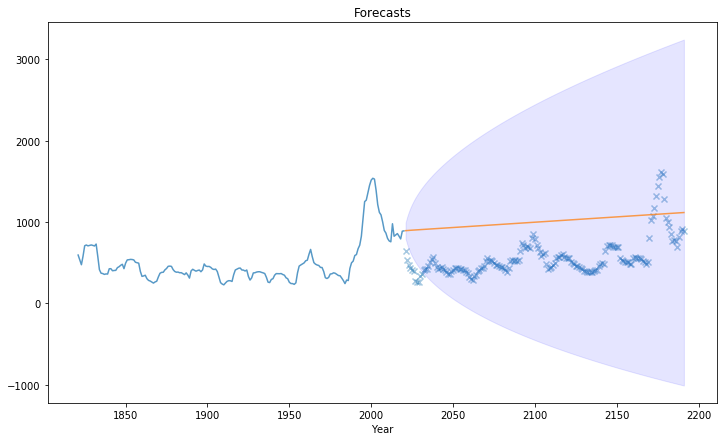

In [17]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# #############################################################################
# Load the data and split it into separate pieces
data = smoothed
train, test = smoothed[:200], smoothed[201:]

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1821  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Forecasts")
plt.xlabel("Year")

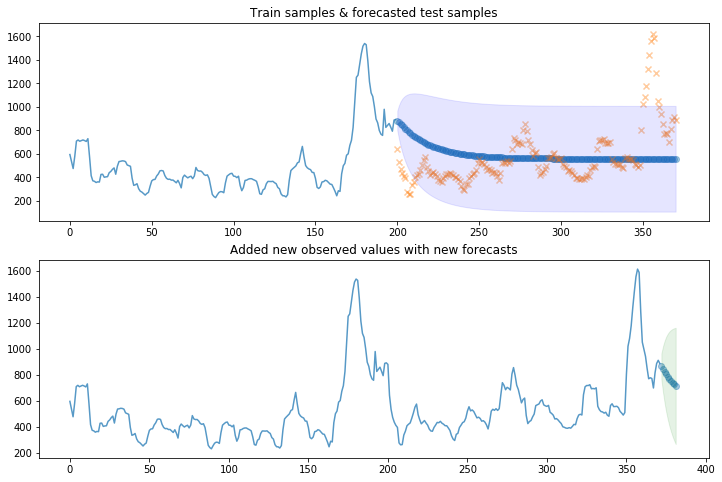

In [18]:
# #############################################################################
# Load the data and split it into separate pieces
data = smoothed
train, test = smoothed[:200], smoothed[201:]

# #############################################################################
# Fit with some validation (cv) samples
arima = pm.auto_arima(train, start_p=1, start_q=1, d=0, max_p=5, max_q=5,
                      out_of_sample_size=10, suppress_warnings=True,
                      stepwise=True, error_action='ignore')

# Now plot the results and the forecast for the test set
preds, conf_int = arima.predict(n_periods=test.shape[0],
                                return_conf_int=True)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(train.shape[0] + preds.shape[0])
axes[0].plot(x_axis[:train.shape[0]], train, alpha=0.75)
axes[0].scatter(x_axis[train.shape[0]:], preds, alpha=0.4, marker='o')
axes[0].scatter(x_axis[train.shape[0]:], test, alpha=0.4, marker='x')
axes[0].fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')

# fill the section where we "held out" samples in our model fit

axes[0].set_title("Train samples & forecasted test samples")

# Now add the actual samples to the model and create NEW forecasts
arima.update(test)
new_preds, new_conf_int = arima.predict(n_periods=10, return_conf_int=True)
new_x_axis = np.arange(data.shape[0] + 10)

axes[1].plot(new_x_axis[:data.shape[0]], data, alpha=0.75)
axes[1].scatter(new_x_axis[data.shape[0]:], new_preds, alpha=0.4, marker='o')
axes[1].fill_between(new_x_axis[-new_preds.shape[0]:],
                     new_conf_int[:, 0],
                     new_conf_int[:, 1],
                     alpha=0.1, color='g')
axes[1].set_title("Added new observed values with new forecasts")
plt.show()

Data shape: 372
Data head:
date
2018-08-22    594.666667
2018-08-23    534.888889
2018-08-24    475.777778
2018-08-25    581.777778
2018-08-26    708.888889
Name: Pesticides, dtype: float64


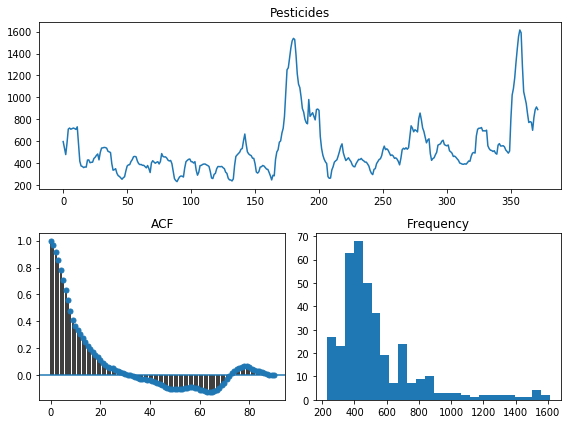

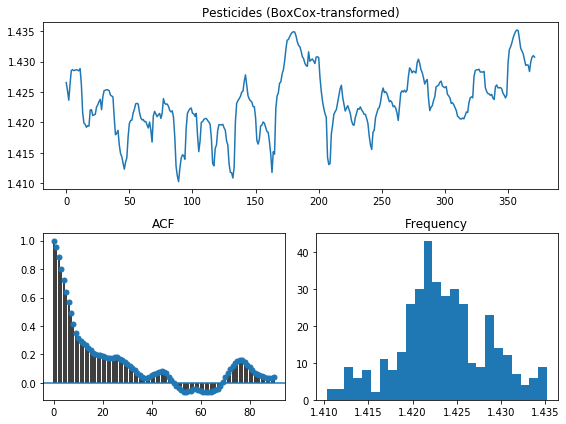


Would the Box-Cox transformation be useful prior to fitting our model??



In [19]:
from pmdarima import preprocessing

# We'll use the sunspots dataset for this example
y = smoothed
print("Data shape: {}".format(y.shape[0]))
print("Data head:")
print(y.head())

# Let's look at the series, its ACF plot, and a histogram of its values
pm.tsdisplay(y, lag_max=90, title="Pesticides", show=True)

# Notice that the histogram is very skewed. This is a prime candidate for
# box-cox transformation
y_bc, _ = preprocessing.BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y)
pm.tsdisplay(
    y_bc, lag_max=90, title="Pesticides (BoxCox-transformed)", show=True)

print("""
Would the Box-Cox transformation be useful prior to fitting our model??
""")